In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("E:/cruise_ship_datasets/output_ships.csv")
df.head()

,name,callsign,imo,cruise_line,major_cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
0,Wind Surf,C6IO6,NaN,1990–1998: Club Med1998 onwards: Windstar Cruises,Other,1990.0,NaN,NaN,8.0,386.0,187.00,NaN,NaN,NaN
1,Marco Polo,C6JZ7,6417097.0,1965–1980?: Baltic Shipping Company[1]1979?–19...,Other,1964.0,Ivan Franko-class passenger ship → Ocean liner,22080.0,NaN,820.0,176.28,passengers ship,BAHAMAS,nassau
2,Seabourn Quest,C6YZ5,9483126.0,Seabourn Cruise Line,Other,2011.0,Seabourn Odyssey class,32477.0,11.0,450.0,198.15,passengers ship,BAHAMAS,nassau
3,Oriana,ZCDU9,9050137.0,P&O Cruises,Other,1995.0,NaN,69840.0,10.0,NaN,260.00,passengers ship,BERMUDA,hamilton
4,European Causeway,C6RG7,9208394.0,P&O Ferries,Other,2000.0,NaN,20646.0,NaN,410.0,156.20,ro,BAHAMAS,nassau


In [4]:
df.isnull().sum()

name                   0
callsign               0
imo                   46
cruise_line           36
major_cruise_line      0
year_built            55
class                127
gross_tonnage         38
decks                110
capacity              66
length                93
vessel_type           46
flag                  47
home_port             85
dtype: int64

In [5]:
df.shape

(276, 14)

### Data Cleaning

In [6]:
df1 = df.dropna(subset=['imo'])


In [7]:
df1.head()

,name,callsign,imo,cruise_line,major_cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
1,Marco Polo,C6JZ7,6417097.0,1965–1980?: Baltic Shipping Company[1]1979?–19...,Other,1964.0,Ivan Franko-class passenger ship → Ocean liner,22080.0,NaN,820.0,176.28,passengers ship,BAHAMAS,nassau
2,Seabourn Quest,C6YZ5,9483126.0,Seabourn Cruise Line,Other,2011.0,Seabourn Odyssey class,32477.0,11.0,450.0,198.15,passengers ship,BAHAMAS,nassau
3,Oriana,ZCDU9,9050137.0,P&O Cruises,Other,1995.0,NaN,69840.0,10.0,NaN,260.00,passengers ship,BERMUDA,hamilton
4,European Causeway,C6RG7,9208394.0,P&O Ferries,Other,2000.0,NaN,20646.0,NaN,410.0,156.20,ro,BAHAMAS,nassau
5,Sensation,C6FM8,8711356.0,Carnival Cruise Lines,Carnival Cruise Line,1993.0,Fantasy-class cruise ship,70538.0,10.0,2056.0,69.00,passengers ship,BAHAMAS,nassau


In [9]:
df1['cruise_line'].fillna('Princess Cruises',inplace=True)

In [10]:
df1['year_built'].fillna('1963',inplace=True)

In [11]:
df1['class'].fillna('Llyods',inplace=True)

In [12]:
df1['decks'].fillna(12,inplace=True)

In [13]:
df1['capacity'].fillna(1770.0,inplace=True)

In [14]:
df1['length'].fillna(df1['length'].mean(),inplace=True)

In [15]:
df1['flag'].fillna('ITALY',inplace=True)

In [16]:
df1['home_port'].fillna('arkhangelsk',inplace=True)

In [17]:
df1.isnull().sum()

name                 0
callsign             0
imo                  0
cruise_line          0
major_cruise_line    0
year_built           0
class                0
gross_tonnage        0
decks                0
capacity             0
length               0
vessel_type          0
flag                 0
home_port            0
dtype: int64

In [ ]:
df1.drop(df1.loc[:,['major_cruise_line']],axis=1,inplace=True)

In [116]:
df1.shape

(230, 13)

#### data is cleaned now

In [35]:
df1

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
1,Marco Polo,C6JZ7,6417097.0,1965–1980?: Baltic Shipping Company[1]1979?–19...,1964,Ivan Franko-class passenger ship → Ocean liner,22080.0,12.0,820.0,176.280000,passengers ship,BAHAMAS,nassau
2,Seabourn Quest,C6YZ5,9483126.0,Seabourn Cruise Line,2011,Seabourn Odyssey class,32477.0,11.0,450.0,198.150000,passengers ship,BAHAMAS,nassau
3,Oriana,ZCDU9,9050137.0,P&O Cruises,1995,Llyods,69840.0,10.0,1770.0,260.000000,passengers ship,BERMUDA,hamilton
4,European Causeway,C6RG7,9208394.0,P&O Ferries,2000,Llyods,20646.0,12.0,410.0,156.200000,ro,BAHAMAS,nassau
5,Sensation,C6FM8,8711356.0,Carnival Cruise Lines,1993,Fantasy-class cruise ship,70538.0,10.0,2056.0,69.000000,passengers ship,BAHAMAS,nassau
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Norbank,PGIS,9056583.0,North Sea Ferries,1993,Llyods,17464.0,12.0,1770.0,166.770000,ro,NETHERLANDS,rotterdam
272,Wind Spirit,C6CY9,8603509.0,Windstar Cruises Ltd.[1],1987,Llyods,5736.0,12.0,148.0,134.000000,passengers ship,BAHAMAS,nassau
273,Silver Shadow,C6FN6,9192167.0,Silversea Cruises,2000,Llyods,28258.0,10.0,382.0,186.000000,passengers ship,BAHAMAS,nassau
274,Millennium,9HJF9,9189419.0,Celebrity Cruises,2000,Millennium-class cruise ship,90963.0,11.0,2138.0,294.000000,passengers ship,MALTA,valletta


In [21]:
df1.dtypes

name              object
callsign          object
imo              float64
cruise_line       object
year_built        object
class             object
gross_tonnage    float64
decks            float64
capacity         float64
length           float64
vessel_type       object
flag              object
home_port         object
dtype: object

In [ ]:
df1['year_built']=pd.to_datetime(df1['year_built'])


In [23]:
df1.dtypes

name                     object
callsign                 object
imo                     float64
cruise_line              object
year_built       datetime64[ns]
class                    object
gross_tonnage           float64
decks                   float64
capacity                float64
length                  float64
vessel_type              object
flag                     object
home_port                object
dtype: object

In [ ]:
df1['Year_Built']=df1['year_built'].dt.year

In [ ]:
df1.drop(df1.loc[:,['year_built']],axis=1,inplace=True)

In [29]:
df1

,name,callsign,imo,cruise_line,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port,Year_Built
1,Marco Polo,C6JZ7,6417097.0,1965–1980?: Baltic Shipping Company[1]1979?–19...,Ivan Franko-class passenger ship → Ocean liner,22080.0,12.0,820.0,176.280000,passengers ship,BAHAMAS,nassau,1970
2,Seabourn Quest,C6YZ5,9483126.0,Seabourn Cruise Line,Seabourn Odyssey class,32477.0,11.0,450.0,198.150000,passengers ship,BAHAMAS,nassau,1970
3,Oriana,ZCDU9,9050137.0,P&O Cruises,Llyods,69840.0,10.0,1770.0,260.000000,passengers ship,BERMUDA,hamilton,1970
4,European Causeway,C6RG7,9208394.0,P&O Ferries,Llyods,20646.0,12.0,410.0,156.200000,ro,BAHAMAS,nassau,1970
5,Sensation,C6FM8,8711356.0,Carnival Cruise Lines,Fantasy-class cruise ship,70538.0,10.0,2056.0,69.000000,passengers ship,BAHAMAS,nassau,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Norbank,PGIS,9056583.0,North Sea Ferries,Llyods,17464.0,12.0,1770.0,166.770000,ro,NETHERLANDS,rotterdam,1970
272,Wind Spirit,C6CY9,8603509.0,Windstar Cruises Ltd.[1],Llyods,5736.0,12.0,148.0,134.000000,passengers ship,BAHAMAS,nassau,1970
273,Silver Shadow,C6FN6,9192167.0,Silversea Cruises,Llyods,28258.0,10.0,382.0,186.000000,passengers ship,BAHAMAS,nassau,1970
274,Millennium,9HJF9,9189419.0,Celebrity Cruises,Millennium-class cruise ship,90963.0,11.0,2138.0,294.000000,passengers ship,MALTA,valletta,1970


### In the above sections we converted year_built as datetime data type and then created a seperate column for it.  

In [117]:
df1['class'].value_counts()

Llyods                        89
Fantasy-class cruise ship      7
Spirit-class cruise ship       6
Vision-class cruise ship       6
Conquest-class cruise ship     5
                              ..
Sun class cruise ship          1
Cruise ship                    1
MDV1200 class fast ferry       1
Vista-class cruise ship        1
S-class ferry                  1
Name: class, Length: 78, dtype: int64

### The above data shows that 'Lloyds' is the most preferred classification society.

In [37]:
df1['cruise_line'].value_counts()

Royal Caribbean International                                                                                                                                                                                                                                                    18
Costa Crociere                                                                                                                                                                                                                                                                   15
Holland America Line                                                                                                                                                                                                                                                             12
Carnival Cruise Lines                                                                                                                                                       

### The above data shows that 'Royal Caribbean International' has most no. of ships in this dataset

In [38]:
df1['year_built'].value_counts()

1963      19
2001.0    13
2000.0    12
2004.0    12
1998.0    11
2003.0    10
2002.0    10
1996.0     8
2008.0     8
1987.0     8
1997.0     7
1992.0     7
1999.0     7
2010.0     6
2006.0     6
1995.0     6
1994.0     6
1993.0     6
1991.0     5
1988.0     5
2007.0     5
1982.0     4
2011.0     4
1963.0     4
2009.0     4
1981.0     3
2005.0     3
1980.0     3
1989.0     3
1971.0     2
1986.0     2
1977.0     2
1990.0     2
1973.0     2
1966.0     2
2014.0     2
2012.0     2
1984.0     2
1969.0     1
1972.0     1
1964.0     1
1975.0     1
2016.0     1
2015.0     1
2013.0     1
Name: year_built, dtype: int64

### the above data shows that most of the ships were built in 1963

In [16]:
df1['vessel_type'].value_counts()

passengers ship    177
ro                  50
passenger            1
research             1
icebreaker           1
Name: vessel_type, dtype: int64

#### as the above data shows passenger as a different category rather than being among the passengers ship, we will just replace it in the following manner

In [119]:
df1[df1['vessel_type']=='passenger']

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
151,St Helena,MMHE5,8716306.0,Andrew Weir Shipping Ltd,1963,Llyods,6767.0,12.0,128.0,105.0,passenger,UNITED KINGDOM,london


In [37]:
df1.replace(to_replace ="passenger", value ="passengers ship",inplace=True) 

c:\users\baps\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [38]:
df1.replace(to_replace ="ro", value ="rollon-rolloff",inplace=True) 

### You can see above how we have replaced the incorrect category

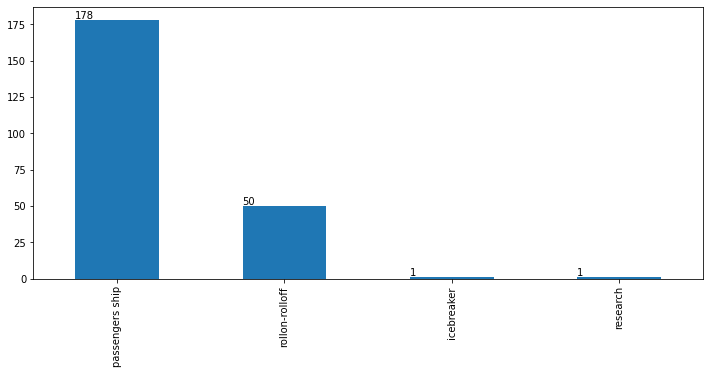

In [39]:
plt.figure(figsize=(12,5))
y=df1['vessel_type'].value_counts().plot(kind='bar')

totals = []

# find the values and append to list
for i in y.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in y.patches:
    # get_x pulls left or right; get_height pushes up or down
    y.text(i.get_x(), i.get_height()+1, \
str(round((i.get_height()), 2)), fontsize=10,color='black')

### the above plot shows that the category of ships that are maximum in our dataset is 'passenger ships'

In [124]:
df1.replace(to_replace='Italy',value='ITALY',inplace=True)

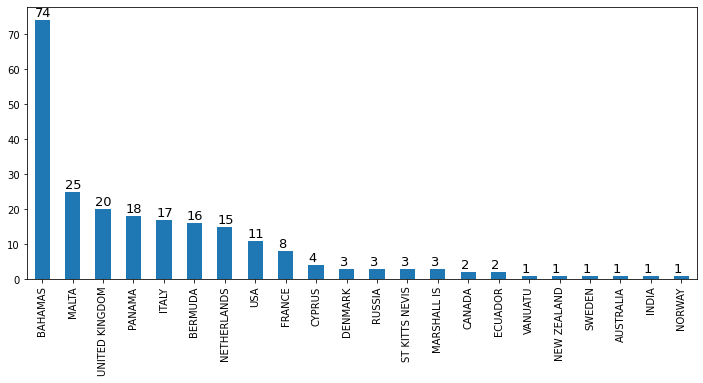

In [85]:
plt.figure(figsize=(12,5))
z=df1['flag'].value_counts().plot(kind='bar')
totals = []

# find the values and append to list
for i in z.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in z.patches:
    # get_x pulls left or right; get_height pushes up or down
    z.text(i.get_x(), i.get_height()+1, \
str(round((i.get_height()), 2)), fontsize=13,color='black')
plt.show()

### from the above plot we have come to know that 'Bahamas' is the most preferred flag of registration

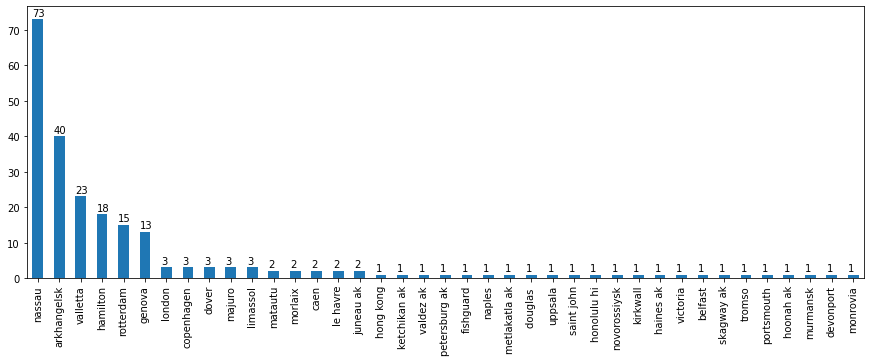

In [90]:
plt.figure(figsize=(15,5))
h=df1['home_port'].value_counts().plot(kind='bar')
totals = []

# find the values and append to list
for i in h.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in h.patches:
    # get_x pulls left or right; get_height pushes up or down
    h.text(i.get_x(), i.get_height()+1, \
str(round((i.get_height()), 2)), fontsize=10,color='black')

### from the above data we can say that most of the ships in the dataset belongs to 'Nassau' as their home port

In [23]:
df1['gross_tonnage'].value_counts()

30277.0     6
90090.0     4
113561.0    3
70367.0     3
90940.0     3
           ..
91740.0     1
19638.0     1
115906.0    1
22986.0     1
22080.0     1
Name: gross_tonnage, Length: 183, dtype: int64

### from the above data generated we have got the no. of ships that mostly have a particular type of gross tonnage for carrying cargo. The most preferrable is 30,277

### The following ships have the maximum gross tonnage

In [128]:
df1[df1['gross_tonnage']==df1['gross_tonnage'].max()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
80,Allure of the Seas,C6XS8,9383948.0,Royal Caribbean International,2010,Oasis-class cruise ship,220000.0,16.0,5400.0,360.0,passengers ship,BAHAMAS,nassau
221,Oasis of the Seas,C6XS7,9383936.0,Royal Caribbean International,2009,Oasis-class cruise ship,220000.0,16.0,5400.0,360.0,passengers ship,BAHAMAS,nassau


### The following ship has the minimum gross tonnage

In [129]:
df1[df1['gross_tonnage']==df1['gross_tonnage'].min()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
215,M/V Lituya,WDB6180,9283148.0,Alaska Marine Highway System,2004,Llyods,758.0,12.0,150.0,220.529761,rollon-rolloff,USA,metlakatla ak


In [131]:
df1['decks'].value_counts()

12.0    95
13.0    25
11.0    24
10.0    19
15.0    13
9.0     10
16.0     7
19.0     6
14.0     5
7.0      4
8.0      4
17.0     4
18.0     4
5.0      3
6.0      3
3.0      3
4.0      1
Name: decks, dtype: int64

### from the above data generated we have got the info about the total no. of decks that ships have. 95 ships have 12 decks where as only one has 4 decks.  

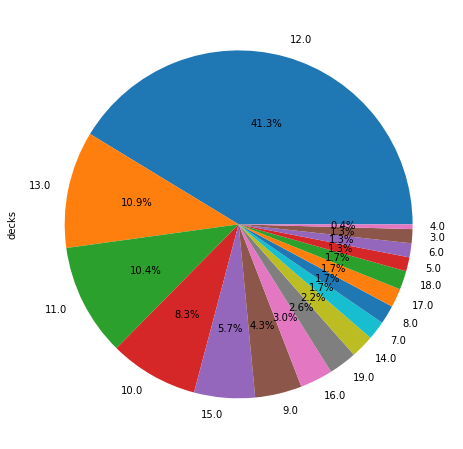

In [59]:
plt.figure(figsize=(15,8))
df1['decks'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### pie chart generated here describes the same the total no. of decks that ships have in terms of percentage

### The following ships have the maximum number of decks

In [141]:
df1[df1['decks']==df1['decks'].max()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
101,Ventura,ZCDT2,9333175.0,P&O Cruises,2008,Grand class cruise ship,116017.0,19.0,3192.0,291.400000,passengers ship,BERMUDA,hamilton
102,Norwegian Epic,C6XP7,9410569.0,Norwegian Cruise Line,2009,Epic-class cruise ship[2],155873.0,19.0,1770.0,329.000000,passengers ship,BAHAMAS,nassau
163,Crown Princess,ZCDM6,9293399.0,Princess Cruise Line,2006,Grand-class cruise ship,113561.0,19.0,3080.0,220.529761,passengers ship,BERMUDA,hamilton
242,Celebrity Solstice,9HRJ9,9362530.0,Celebrity Cruises,2008,Solstice-class cruise ship,121878.0,19.0,2852.0,220.529761,passengers ship,MALTA,valletta
260,Celebrity Equinox,9HXD9,9372456.0,Celebrity Cruises,2009,Solstice-class cruise ship,121878.0,19.0,2850.0,317.200000,passengers ship,MALTA,valletta
275,Ruby Princess,ZCDY2,9378462.0,Princess Cruises,2008,Grand class cruise ship,113561.0,19.0,3080.0,220.529761,passengers ship,BERMUDA,hamilton


### The following ships have the minimum number of decks

In [130]:
df1[df1['decks']==df1['decks'].min()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
116,Le Ponant,FGZZ,8914219.0,Princess Cruises,1991,Llyods,1189.0,3.0,67.0,88.0,passengers ship,FRANCE,matautu
172,N G Explorer,C6WR2,8019356.0,Lindblad Expeditions,1963,Llyods,6471.0,3.0,148.0,112.0,passengers ship,BAHAMAS,nassau
240,Catalonia Portsmouth Express,C6FQ4,9176046.0,Viking Line 2017-presentGotlandsbåten AB 2015-...,1998,Det Norske Veritas 1A1 HSLC R1 Car Ferry A E0,5903.0,3.0,900.0,91.0,rollon-rolloff,SWEDEN,uppsala


In [134]:
df1['capacity'].value_counts()

1770.0    30
3780.0     5
2974.0     5
2124.0     5
2056.0     4
          ..
1980.0     1
2415.0     1
3470.0     1
1878.0     1
820.0      1
Name: capacity, Length: 140, dtype: int64

### from the above data we can say that there are 30 ships that have the ability to carry 1770 people onboard 

### The following ships have the maximum capacity to take people onboard

In [143]:
df1[df1['capacity']==df1['capacity'].max()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
80,Allure of the Seas,C6XS8,9383948.0,Royal Caribbean International,2010,Oasis-class cruise ship,220000.0,16.0,5400.0,360.0,passengers ship,BAHAMAS,nassau
221,Oasis of the Seas,C6XS7,9383936.0,Royal Caribbean International,2009,Oasis-class cruise ship,220000.0,16.0,5400.0,360.0,passengers ship,BAHAMAS,nassau


### The following ship has the minimum capacity to take people onboard

In [131]:
df1[df1['capacity']==df1['capacity'].min()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
250,Riverdance,C6CG3,7635361.0,Crescent Marine Services Ltd,1977,Llyods,6041.0,12.0,12.0,116.31,rollon-rolloff,ITALY,arkhangelsk


### The following ships have the maximum length

In [145]:
df1[df1['length']==df1['length'].max()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
80,Allure of the Seas,C6XS8,9383948.0,Royal Caribbean International,2010,Oasis-class cruise ship,220000.0,16.0,5400.0,360.0,passengers ship,BAHAMAS,nassau
221,Oasis of the Seas,C6XS7,9383936.0,Royal Caribbean International,2009,Oasis-class cruise ship,220000.0,16.0,5400.0,360.0,passengers ship,BAHAMAS,nassau


### The following ships has the minimum length

In [146]:
df1[df1['length']==df1['length'].min()]

,name,callsign,imo,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
10,Spirit Of Glacier Bay,WDD4938,8883563.0,Cruise West,1984,Llyods,1471.0,12.0,102.0,52.578,passengers ship,USA,arkhangelsk


### To compare the data of various types of ships in terms of maximum and minimum the following operations have been done

In [41]:
g=df1.groupby('vessel_type')

In [42]:
g['imo','class','Year_Built','gross_tonnage','decks','capacity','length','flag','home_port'].agg(np.max)

c:\users\baps\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,imo,class,Year_Built,gross_tonnage,decks,capacity,length,flag,home_port
vessel_type,,,,,,,,,
icebreaker,7824405.0,Icebreaker,1970,12919.0,12.0,102.0,129.020000,RUSSIA,murmansk
passengers ship,9692569.0,cruise ship,1970,220000.0,19.0,5400.0,360.000000,VANUATU,valletta
research,8010348.0,Akademik Shuleykin-class research vessel; now ...,1970,1753.0,12.0,48.0,69.700000,RUSSIA,arkhangelsk
rollon-rolloff,9370018.0,Superfast III class fast ropax ferry,1970,59925.0,12.0,2415.0,220.529761,USA,victoria


In [43]:
g['imo','class','Year_Built','gross_tonnage','decks','capacity','length','flag','home_port'].agg(np.min)

c:\users\baps\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,imo,class,Year_Built,gross_tonnage,decks,capacity,length,flag,home_port
vessel_type,,,,,,,,,
icebreaker,7824405.0,Icebreaker,1970,12919.0,12.0,102.0,129.020,RUSSIA,murmansk
passengers ship,5260679.0,Caribbean Class cruise ship,1963,1189.0,3.0,67.0,52.578,BAHAMAS,arkhangelsk
research,8010348.0,Akademik Shuleykin-class research vessel; now ...,1970,1753.0,12.0,48.0,69.700,RUSSIA,arkhangelsk
rollon-rolloff,5218183.0,"+100 A 1, Ro-Ro Cargo/Passenger Ferry + LMC, U...",1963,758.0,3.0,12.0,86.620,AUSTRALIA,arkhangelsk


#### As the number of 'ice breaker' and 'research' ships are only 1 in number so no considerable changes have been seen from the above data generated

In [35]:
df1.head()

,name,callsign,imo,cruise_line,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port,Year_Built
1,Marco Polo,C6JZ7,6417097.0,1965–1980?: Baltic Shipping Company[1]1979?–19...,Ivan Franko-class passenger ship → Ocean liner,22080.0,12.0,820.0,176.28,passengers ship,BAHAMAS,nassau,1970
2,Seabourn Quest,C6YZ5,9483126.0,Seabourn Cruise Line,Seabourn Odyssey class,32477.0,11.0,450.0,198.15,passengers ship,BAHAMAS,nassau,1970
3,Oriana,ZCDU9,9050137.0,P&O Cruises,Llyods,69840.0,10.0,1770.0,260.00,passengers ship,BERMUDA,hamilton,1970
4,European Causeway,C6RG7,9208394.0,P&O Ferries,Llyods,20646.0,12.0,410.0,156.20,ro,BAHAMAS,nassau,1970
5,Sensation,C6FM8,8711356.0,Carnival Cruise Lines,Fantasy-class cruise ship,70538.0,10.0,2056.0,69.00,passengers ship,BAHAMAS,nassau,1970


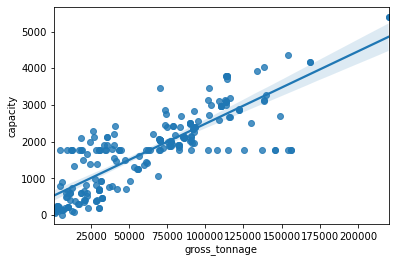

In [44]:
sns.regplot(x='gross_tonnage',y='capacity',data=df1)

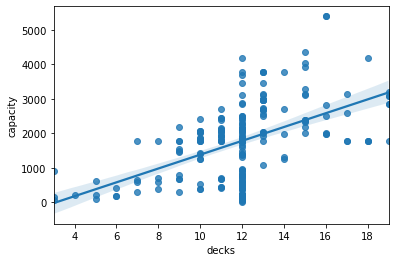

In [51]:
sns.regplot(x='decks',y='capacity',data=df1)

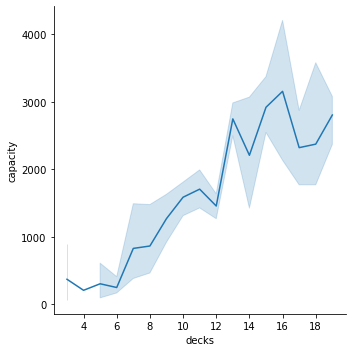

In [52]:
sns.relplot(x='decks',y='capacity',data=df1,kind='line')

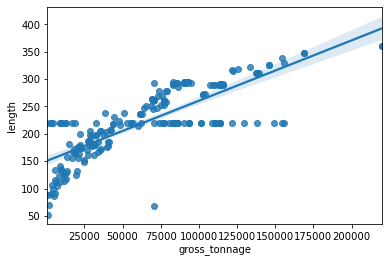

In [49]:
sns.regplot(x='gross_tonnage',y='length',data=df1)